In [1]:

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2 # comparez vos resultats à une implementation opencv

from skimage import data

In [2]:
matplotlib.rcParams['font.size'] = 18

names = ['astronaut',
         'binary_blobs',
         'camera',
         'checkerboard',
         'chelsea',
         'clock',
         'coffee',
         'coins',
         'horse',
         'logo',
         'page',
         'text',
         'rocket']

images = {}
for name in names:
    caller = getattr(data, name)
    image = caller()
    images[name] = image.copy()


In [3]:
for name in images:
    img = images[name]
    print('name: ', name, ' rank: ', img.ndim, ' shape: ', img.shape, ' dtype: ', img.dtype)

name:  astronaut  rank:  3  shape:  (512, 512, 3)  dtype:  uint8
name:  binary_blobs  rank:  2  shape:  (512, 512)  dtype:  bool
name:  camera  rank:  2  shape:  (512, 512)  dtype:  uint8
name:  checkerboard  rank:  2  shape:  (200, 200)  dtype:  uint8
name:  chelsea  rank:  3  shape:  (300, 451, 3)  dtype:  uint8
name:  clock  rank:  2  shape:  (300, 400)  dtype:  uint8
name:  coffee  rank:  3  shape:  (400, 600, 3)  dtype:  uint8
name:  coins  rank:  2  shape:  (303, 384)  dtype:  uint8
name:  horse  rank:  2  shape:  (328, 400)  dtype:  bool
name:  logo  rank:  3  shape:  (500, 500, 4)  dtype:  uint8
name:  page  rank:  2  shape:  (191, 384)  dtype:  uint8
name:  text  rank:  2  shape:  (172, 448)  dtype:  uint8
name:  rocket  rank:  3  shape:  (427, 640, 3)  dtype:  uint8


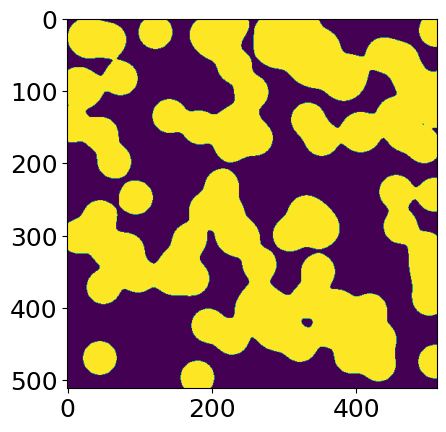

In [4]:
plt.imshow(images["binary_blobs"])

In [5]:
def uint8_RGB_to_float32(img):
    return img.astype(np.float32)/255.

def uint8_GRAY_to_float32(img):
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img, axis=-1)
    # img = np.tile(img, (1, 1, 3))
    return img

def bool_to_float32(img):
    img = img.astype(np.float32)
    img = np.expand_dims(img, axis=-1)
    # img = np.tile(img, (1, 1, 3))
    return img

def float32_to_uint8(img):
    img = 255.*img
    return img.astype(np.uint8)

def to_float32(img):
    if img.dtype == 'uint8':
        if img.ndim == 2:
            return uint8_GRAY_to_float32(img)
        else:
            return uint8_RGB_to_float32(img)
    if img.dtype == 'bool':
        return bool_to_float32(img)

for name in images:
    img = images[name]
    img = to_float32(img)
    images[name] = img

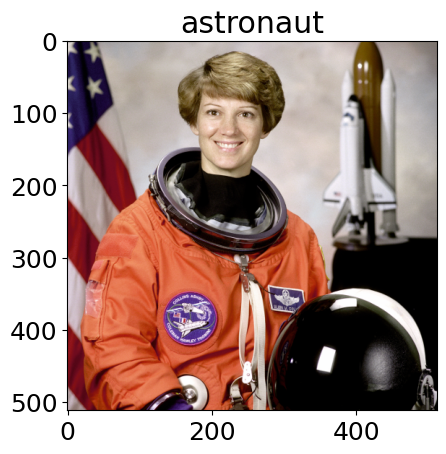

In [6]:
def imshow(img, title=''):
    plt.title(title)
    if img.ndim == 2:
        plt.imshow(img, cmap=plt.cm.gray)
    else:
        if img.shape[2] == 1:
          img = np.repeat(img, repeats=3, axis=2)
        plt.imshow(img)
    
    plt.show()

imshow(images['astronaut'], 'astronaut')

**Question 14.** Écrivez une fonction `reduce_resolution(img, k)` effectuant 
k
 fois cette opération produisant ainsi une image réduite d'un facteur 
2
k
. Afin d'eviter de gérer des cas particuliers en fonction du nombre de canaux on pourra récupérer le vecteur associé au pixel 
(
i
,
j
)
 via img[i, j, ...] 

In [7]:
reduced_shape = (int((img.shape[0] + 1)/2), int((img.shape[1]+1)/2), img.shape[2])
new_img = np.zeros(reduced_shape)

In [8]:
new_img.shape

(214, 320, 3)

In [9]:
for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        new_img[i, j] = img[2*i:2*i+2, 2*j: 2*j+2]\
            .mean(axis = (0,1))

In [10]:
np.isnan(img)\
    .sum()

0

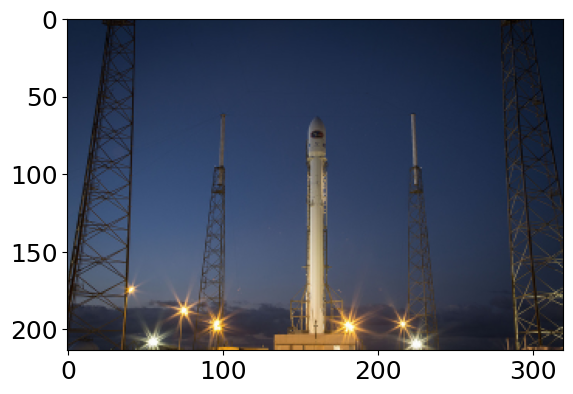

In [11]:
imshow(new_img)

In [12]:
img = new_img

In [13]:
img.shape

(214, 320, 3)

In [14]:
img[1:3, 1:3].mean(axis=(0,1))

array([0.07058824, 0.13333334, 0.23529412])

In [15]:
def reduce_resolution(img : np.ndarray,
                      k : int):
    if (k > 1):
        img =  reduce_resolution(img, k-1)
        
    reduced_shape = (int((img.shape[0] + 1)/2), 
                     int((img.shape[1]+1)/2), 
                     img.shape[2])

    new_img = np.zeros(reduced_shape)

    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            new_img[i, j] = img[2*i:2*i+2, 2*j: 2*j+2]\
                .mean(axis = (0,1))
            
    return new_img

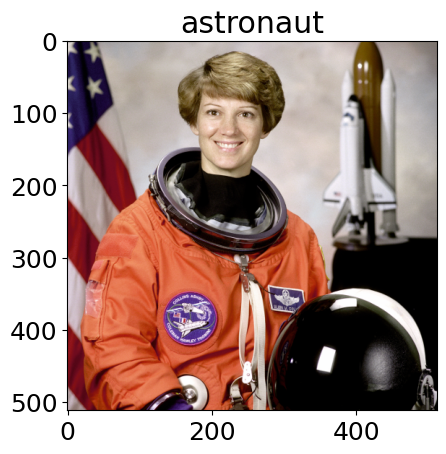

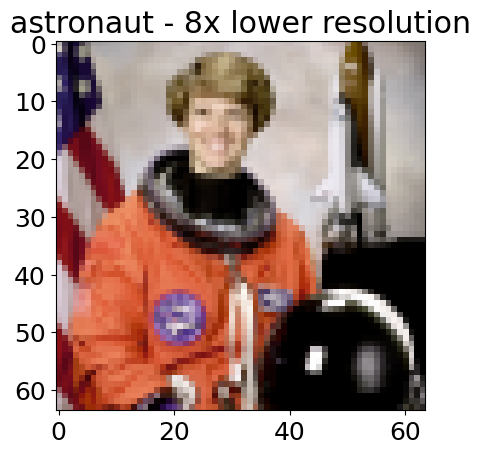

In [16]:
imshow(
    images['astronaut'],
    title = "astronaut"
)

imshow(
    reduce_resolution(images['astronaut'], 3),
    title = "astronaut - 8x lower resolution"
)

**Question 15.** Ecrire une fonction `rescale_naive(img, w_new, h_new)` prenant une image de taille 
w
×
h
 et retournant une image de taille 
w
n
e
w
×
h
n
e
w
. Pour rendre le code plus flexible on s'appuiera sur une fonction get_value_naive(img, x, y) permettant de recuperer la valeur d'un pixel aux coordonnées 
(
x
,
y
)
.

In [17]:
new_img = np.zeros((100,200, img.shape[2]))

In [18]:
def get_value_naive(img : np.ndarray,
                    x : int,
                    y: int) -> np.ndarray:
    
    return img[x,y]

In [19]:
def rescale_naive(img : np.ndarray,
                  w_new : int, 
                  h_new : int) -> np.ndarray:
    
    new_img = np.zeros((w_new, h_new, img.shape[2]))
    factor_x = new_img.shape[0] / img.shape[0]
    factor_y = new_img.shape[1] / img.shape[1] 

    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            new_img[i, j] = get_value_naive(
                img,
                int(i / factor_x),
                int(j / factor_y)
            )

    return new_img

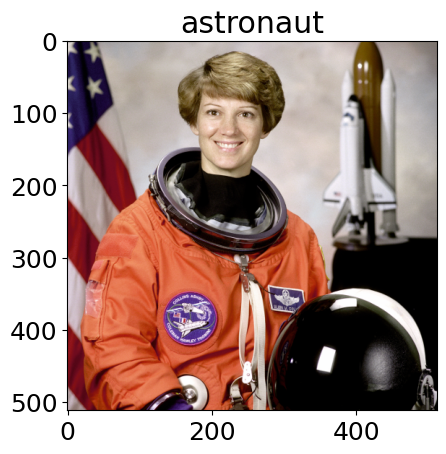

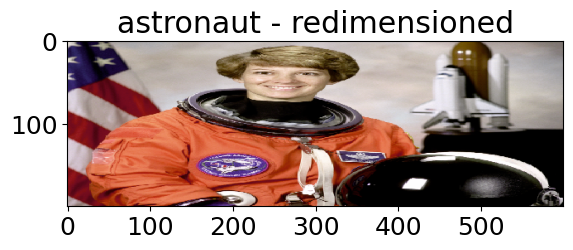

In [20]:
imshow(
    images['astronaut'],
    title = "astronaut"
)

imshow(
    rescale_naive(images['astronaut'], 200,600),
    title = "astronaut - redimensioned"
)

**Question 16.** Écrivez une fonction `rotate90(img)` retournant une copie de img ayant subi une rotation de 90 degrés dans le sens trigonométrique.

In [21]:
img.shape

new_shape = (img.shape[1], img.shape[0], img.shape[2])
new_img = np.zeros(new_shape)

In [22]:
for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        new_img[i,j] = img[j,i]

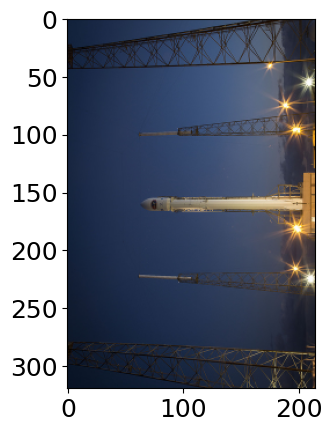

In [23]:
imshow(new_img)

In [24]:
def rotate90(img : np.ndarray):

    new_shape = (img.shape[1], img.shape[0], img.shape[2])
    new_img = np.zeros(new_shape)

    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            new_img[i,j] = img[j,i]

    return new_img

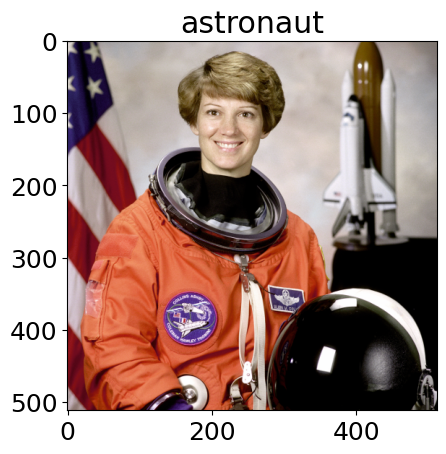

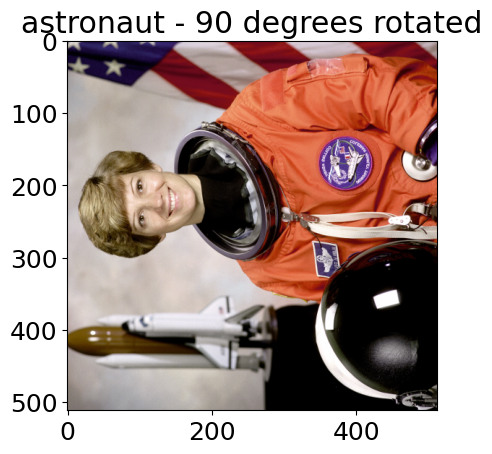

In [25]:
imshow(
    images['astronaut'],
    title = "astronaut"
)

imshow(
    rotate90(images['astronaut']),
    title = "astronaut - 90 degrees rotated"
)

**Question 17.** Codez `rotate_naive(img, theta)`

In [26]:
new_img = np.zeros_like(img)
theta = np.pi/4
rotation_matrix = np.array([
    [np.cos(theta), np.sin(theta)],
    [-np.sin(theta), np.cos(theta)]
])


In [27]:
img_midpoint = np.array([new_img.shape[0]//2, new_img.shape[1]//2]) 

for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        new_x, new_y = rotation_matrix @ (np.array([i,j])-img_midpoint)
        new_x = new_x + img_midpoint[0]
        new_y = new_y + img_midpoint[1]
        try:
            new_img[i,j] = img[int(new_x),int(new_y)]

        except:
            new_img[i,j] = 0

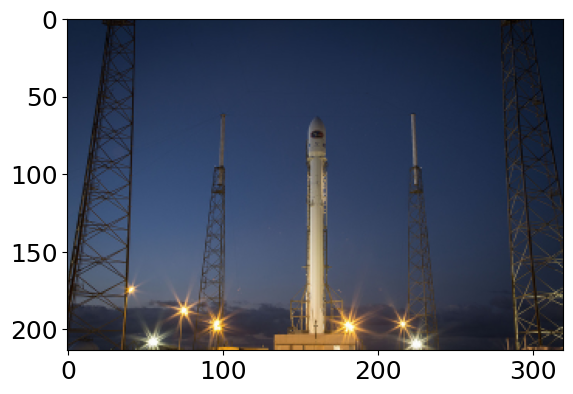

In [28]:
imshow(img)

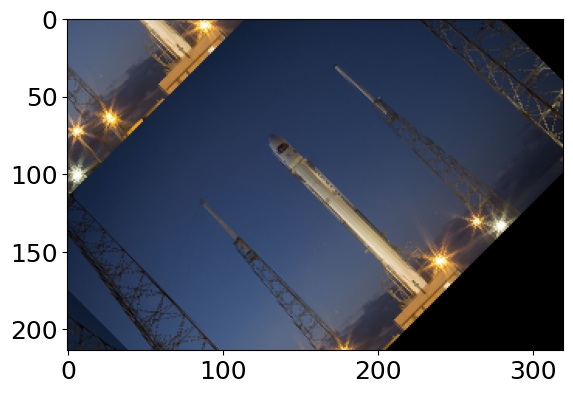

In [29]:
imshow(new_img)

## L'operation de convolution

**Question 19.** Écrivez une fonction `convolution(img, w)` effectuant une convolution entre une image img et un noyau w , préservant la taille de l'image originale. Utilisez la pour écrire une fonction `gaussian_blur(img)` effectuant la convolution de img par le noyau précédent.

In [48]:
blur_kernel = (1./273.)*np.array([
    [1., 4. , 7. , 4. , 1.],
    [4., 16., 26., 16., 4.],
    [7., 26., 41., 26., 7.],
    [4., 16., 26., 16., 4.],
    [1., 4. , 7. , 4. , 1.]
])

sharpen_kernel = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])

outline_kernel = np.array([[-1, -1, -1], 
                           [-1, 8, -1], 
                           [-1, -1, -1]])


In [50]:
(outline_kernel * sharpen_kernel).sum()

44

In [45]:
new_img = cv2.filter2D(images['astronaut'], -1, sharpen_kernel)

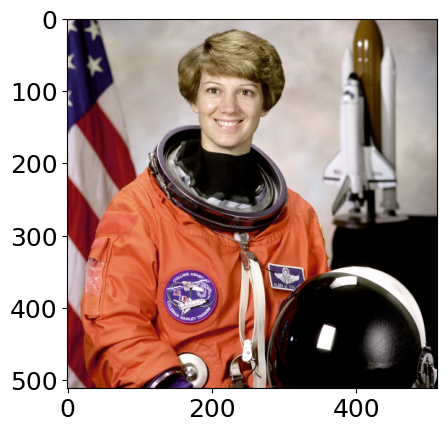

In [46]:
imshow(images['astronaut'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


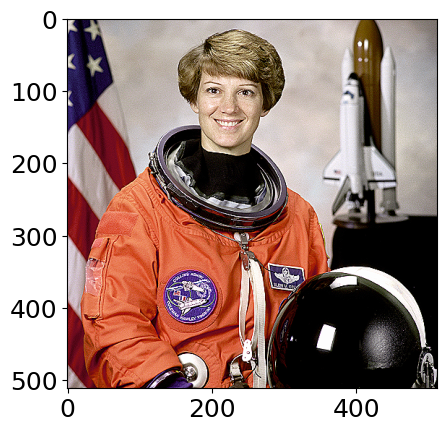

In [47]:
imshow(new_img)

In [168]:
def convolution(img : np.ndarray,
                kernel : np.ndarray) -> np.ndarray:
    
    new_img = np.zeros_like(img)
    kernel_shape = kernel.shape[0]
    new_img1 = np.pad(img, kernel_shape, mode= 'edge')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            try:
                new_img[i,j,0] = (new_img1[i:i+kernel_shape, j:j+kernel_shape,kernel_shape] * kernel)\
                    .sum()
                new_img[i,j,1] = (new_img1[i:i+kernel_shape, j:j+kernel_shape,kernel_shape + 1] * kernel)\
                    .sum()
                new_img[i,j,2] = (new_img1[i:i+kernel_shape, j:j+kernel_shape,kernel_shape + 2] * kernel)\
                    .sum()
            except:
                pass

    return new_img

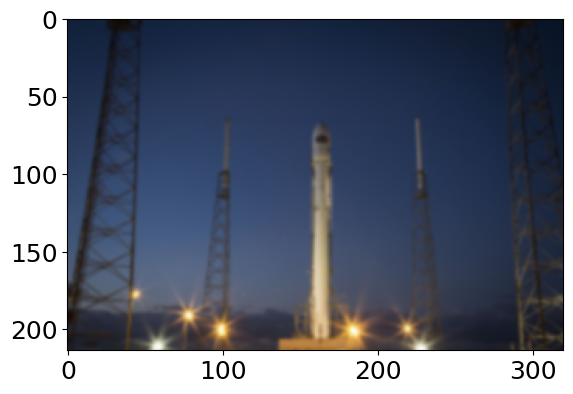

In [169]:
imshow(convolution(img, blur_kernel))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


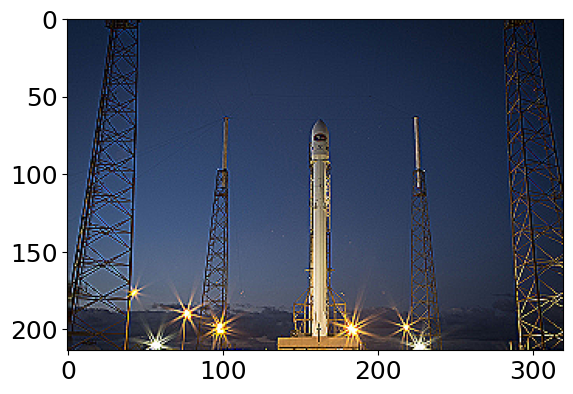

In [170]:
imshow(convolution(img, sharpen_kernel))

In [179]:
size = 10
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[:,int((size-1)/2)] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size


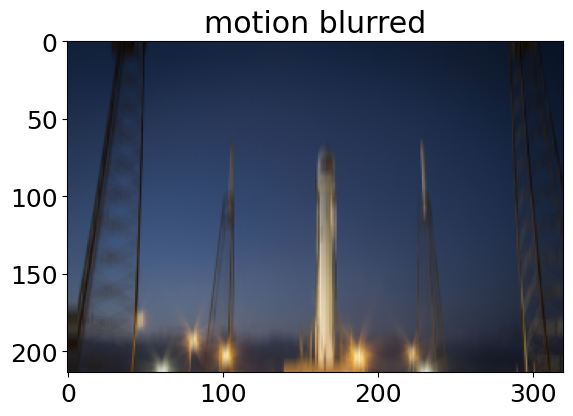

In [180]:
imshow(convolution(img, kernel_motion_blur), title = 'motion blurred')

In [181]:
imshow(cv2.filter2D(img, -1, kernel_motion_blur))

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'filter2D'
> Overload resolution failed:
>  - filter2D() missing required argument 'kernel' (pos 3)
>  - filter2D() missing required argument 'kernel' (pos 3)
